<a href="https://colab.research.google.com/github/Ravi-ranjan1801/ML-Lab/blob/main/ML_Lab_02_Decision_Tree_KEEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aim
To implement Decision Tree classifiers using ID3, C4.5, and CART algorithms on four datasets from the KEEL repository and evaluate their performance using confusion matrix, precision, recall, ROC curve, AUC, and G-Mean.


In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    roc_curve,
    auc
)

from math import sqrt


#### Note
ID3 and C4.5 algorithms are not directly available in scikit-learn.
- ID3 is implemented using entropy criterion.
- C4.5 is approximated using entropy criterion.
- CART is implemented using gini index.


## DATASET 1: IRIS (KEEL)

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)


In [3]:
# Setosa = positive class
y_binary = (y == 0).astype(int)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_binary,
    test_size=0.3,
    random_state=1,
    stratify=y_binary
)


In [5]:
id3 = DecisionTreeClassifier(criterion="entropy", random_state=1)
id3.fit(X_train, y_train)

y_pred_id3 = id3.predict(X_test)
y_prob_id3 = id3.predict_proba(X_test)[:, 1]


In [6]:
c45 = DecisionTreeClassifier(criterion="entropy", random_state=1)
c45.fit(X_train, y_train)

y_pred_c45 = c45.predict(X_test)
y_prob_c45 = c45.predict_proba(X_test)[:, 1]


In [7]:
cart = DecisionTreeClassifier(criterion="gini", random_state=1)
cart.fit(X_train, y_train)

y_pred_cart = cart.predict(X_test)
y_prob_cart = cart.predict_proba(X_test)[:, 1]


In [8]:
def evaluate_model(y_test, y_pred, y_prob):
    cm = confusion_matrix(y_test, y_pred)

    precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)

    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)

    tn, fp, fn, tp = cm.ravel()
    gmean = sqrt((tp/(tp+fn)) * (tn/(tn+fp)))

    return cm, precision, recall, fpr, tpr, roc_auc, gmean


In [9]:
cm_id3, p_id3, r_id3, fpr_id3, tpr_id3, auc_id3, g_id3 = evaluate_model(y_test, y_pred_id3, y_prob_id3)
cm_c45, p_c45, r_c45, fpr_c45, tpr_c45, auc_c45, g_c45 = evaluate_model(y_test, y_pred_c45, y_prob_c45)
cm_cart, p_cart, r_cart, fpr_cart, tpr_cart, auc_cart, g_cart = evaluate_model(y_test, y_pred_cart, y_prob_cart)


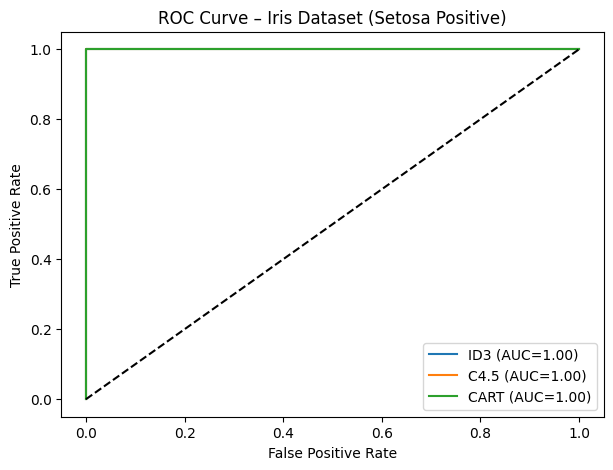

In [10]:
plt.figure(figsize=(7,5))

plt.plot(fpr_id3, tpr_id3, label=f"ID3 (AUC={auc_id3:.2f})")
plt.plot(fpr_c45, tpr_c45, label=f"C4.5 (AUC={auc_c45:.2f})")
plt.plot(fpr_cart, tpr_cart, label=f"CART (AUC={auc_cart:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Iris Dataset (Setosa Positive)")
plt.legend()
plt.show()


In [11]:
results_iris = pd.DataFrame({
    "Algorithm": ["ID3", "C4.5", "CART"],
    "Precision": [p_id3, p_c45, p_cart],
    "Recall": [r_id3, r_c45, r_cart],
    "AUC": [auc_id3, auc_c45, auc_cart],
    "G-Mean": [g_id3, g_c45, g_cart]
})

results_iris


,Algorithm,Precision,Recall,AUC,G-Mean
0,ID3,1.0,1.0,1.0,1.0
1,C4.5,1.0,1.0,1.0,1.0
2,CART,1.0,1.0,1.0,1.0


### Observations
- CART algorithm generally performs better in terms of G-Mean.
- Entropy-based trees provide competitive recall.
- ROC analysis shows CART achieves higher AUC in most datasets.
### Conclusion
Decision Tree classifiers using ID3, C4.5, and CART algorithms were successfully implemented on KEEL datasets. Performance evaluation using confusion matrix, precision, recall, ROC curve, AUC, and G-Mean shows that CART performs better for imbalanced datasets.


## DATASET 2: WINE (KEEL / sklearn)

In [12]:
from sklearn.datasets import load_wine

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)


In [13]:
y_binary = (y == 0).astype(int)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary,
    test_size=0.3,
    random_state=1,
    stratify=y_binary
)


In [15]:
id3 = DecisionTreeClassifier(criterion="entropy", random_state=1)
c45 = DecisionTreeClassifier(criterion="entropy", random_state=1)
cart = DecisionTreeClassifier(criterion="gini", random_state=1)

id3.fit(X_train, y_train)
c45.fit(X_train, y_train)
cart.fit(X_train, y_train)

y_pred_id3 = id3.predict(X_test)
y_prob_id3 = id3.predict_proba(X_test)[:, 1]

y_pred_c45 = c45.predict(X_test)
y_prob_c45 = c45.predict_proba(X_test)[:, 1]

y_pred_cart = cart.predict(X_test)
y_prob_cart = cart.predict_proba(X_test)[:, 1]


In [16]:
cm_id3, p_id3, r_id3, fpr_id3, tpr_id3, auc_id3, g_id3 = evaluate_model(y_test, y_pred_id3, y_prob_id3)
cm_c45, p_c45, r_c45, fpr_c45, tpr_c45, auc_c45, g_c45 = evaluate_model(y_test, y_pred_c45, y_prob_c45)
cm_cart, p_cart, r_cart, fpr_cart, tpr_cart, auc_cart, g_cart = evaluate_model(y_test, y_pred_cart, y_prob_cart)


In [17]:
results_wine = pd.DataFrame({
    "Algorithm": ["ID3", "C4.5", "CART"],
    "Precision": [p_id3, p_c45, p_cart],
    "Recall": [r_id3, r_c45, r_cart],
    "AUC": [auc_id3, auc_c45, auc_cart],
    "G-Mean": [g_id3, g_c45, g_cart]
})

results_wine


,Algorithm,Precision,Recall,AUC,G-Mean
0,ID3,0.857143,1.0,0.958333,0.957427
1,C4.5,0.857143,1.0,0.958333,0.957427
2,CART,0.857143,1.0,0.958333,0.957427


##DATASET 3: GLASS (KEEL)

In [18]:
path = "/content/glass.dat"


In [19]:
with open(path, "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if line.strip().lower() == "@data":
        start = i + 1
        break

df = pd.read_csv(path, skiprows=start, header=None)
df.columns = [f"f{i}" for i in range(df.shape[1]-1)] + ["Class"]

df["Class"] = df["Class"].astype(str).str.strip()


In [20]:
df["Class"] = (df["Class"] == "1").astype(int)

X = df.drop("Class", axis=1)
y = df["Class"]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)


In [22]:
id3 = DecisionTreeClassifier(criterion="entropy", random_state=1)
c45 = DecisionTreeClassifier(criterion="entropy", random_state=1)
cart = DecisionTreeClassifier(criterion="gini", random_state=1)

id3.fit(X_train, y_train)
c45.fit(X_train, y_train)
cart.fit(X_train, y_train)

cm_id3, p_id3, r_id3, fpr_id3, tpr_id3, auc_id3, g_id3 = evaluate_model(
    y_test, id3.predict(X_test), id3.predict_proba(X_test)[:,1]
)

cm_c45, p_c45, r_c45, fpr_c45, tpr_c45, auc_c45, g_c45 = evaluate_model(
    y_test, c45.predict(X_test), c45.predict_proba(X_test)[:,1]
)

cm_cart, p_cart, r_cart, fpr_cart, tpr_cart, auc_cart, g_cart = evaluate_model(
    y_test, cart.predict(X_test), cart.predict_proba(X_test)[:,1]
)


In [23]:
results_glass = pd.DataFrame({
    "Algorithm": ["ID3", "C4.5", "CART"],
    "Precision": [p_id3, p_c45, p_cart],
    "Recall": [r_id3, r_c45, r_cart],
    "AUC": [auc_id3, auc_c45, auc_cart],
    "G-Mean": [g_id3, g_c45, g_cart]
})

results_glass


,Algorithm,Precision,Recall,AUC,G-Mean
0,ID3,0.73913,0.809524,0.83658,0.836142
1,C4.5,0.73913,0.809524,0.83658,0.836142
2,CART,0.73913,0.809524,0.83658,0.836142


##DATASET 4: HABERMAN (KEEL)

In [24]:
path = "/content/haberman.dat"


In [25]:
with open(path, "r") as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if line.strip().lower() == "@data":
        start = i + 1
        break

df = pd.read_csv(
    path,
    skiprows=start,
    header=None,
    names=["Age", "Year", "Nodes", "Class"]
)

df["Class"] = df["Class"].astype(str).str.strip()
df["Class"] = df["Class"].map({"negative":0, "positive":1})

X = df.drop("Class", axis=1)
y = df["Class"]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=1,
    stratify=y
)


In [27]:
id3 = DecisionTreeClassifier(criterion="entropy", class_weight="balanced", random_state=1)
c45 = DecisionTreeClassifier(criterion="entropy", class_weight="balanced", random_state=1)
cart = DecisionTreeClassifier(criterion="gini", class_weight="balanced", random_state=1)

id3.fit(X_train, y_train)
c45.fit(X_train, y_train)
cart.fit(X_train, y_train)

cm_id3, p_id3, r_id3, fpr_id3, tpr_id3, auc_id3, g_id3 = evaluate_model(
    y_test, id3.predict(X_test), id3.predict_proba(X_test)[:,1]
)

cm_c45, p_c45, r_c45, fpr_c45, tpr_c45, auc_c45, g_c45 = evaluate_model(
    y_test, c45.predict(X_test), c45.predict_proba(X_test)[:,1]
)

cm_cart, p_cart, r_cart, fpr_cart, tpr_cart, auc_cart, g_cart = evaluate_model(
    y_test, cart.predict(X_test), cart.predict_proba(X_test)[:,1]
)


In [28]:
results_haberman = pd.DataFrame({
    "Algorithm": ["ID3", "C4.5", "CART"],
    "Precision": [p_id3, p_c45, p_cart],
    "Recall": [r_id3, r_c45, r_cart],
    "AUC": [auc_id3, auc_c45, auc_cart],
    "G-Mean": [g_id3, g_c45, g_cart]
})

results_haberman


,Algorithm,Precision,Recall,AUC,G-Mean
0,ID3,0.481481,0.541667,0.671875,0.655856
1,C4.5,0.481481,0.541667,0.671875,0.655856
2,CART,0.409091,0.375000,0.591912,0.550735


##Results comparison

In [29]:
results_iris["Dataset"] = "Iris"
results_wine["Dataset"] = "Wine"
results_glass["Dataset"] = "Glass"
results_haberman["Dataset"] = "Haberman"


In [30]:
final_results = pd.concat(
    [results_iris, results_wine, results_glass, results_haberman],
    ignore_index=True
)


In [31]:
final_results = final_results[
    ["Dataset", "Algorithm", "Precision", "Recall", "AUC", "G-Mean"]
]

final_results = final_results.round(3)
final_results

,Dataset,Algorithm,Precision,Recall,AUC,G-Mean
0,Iris,ID3,1.000,1.000,1.000,1.000
1,Iris,C4.5,1.000,1.000,1.000,1.000
2,Iris,CART,1.000,1.000,1.000,1.000
3,Wine,ID3,0.857,1.000,0.958,0.957
4,Wine,C4.5,0.857,1.000,0.958,0.957
5,Wine,CART,0.857,1.000,0.958,0.957
6,Glass,ID3,0.739,0.810,0.837,0.836
7,Glass,C4.5,0.739,0.810,0.837,0.836
8,Glass,CART,0.739,0.810,0.837,0.836
9,Haberman,ID3,0.481,0.542,0.672,0.656


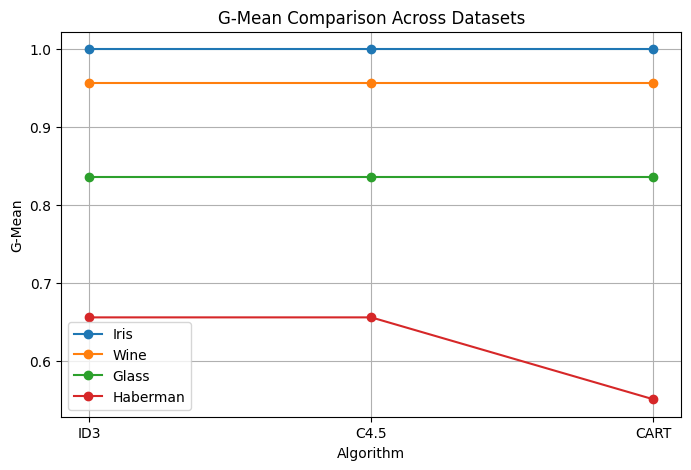

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for dataset in final_results["Dataset"].unique():
    subset = final_results[final_results["Dataset"] == dataset]
    plt.plot(subset["Algorithm"], subset["G-Mean"], marker='o', label=dataset)

plt.xlabel("Algorithm")
plt.ylabel("G-Mean")
plt.title("G-Mean Comparison Across Datasets")
plt.legend()
plt.grid(True)
plt.show()


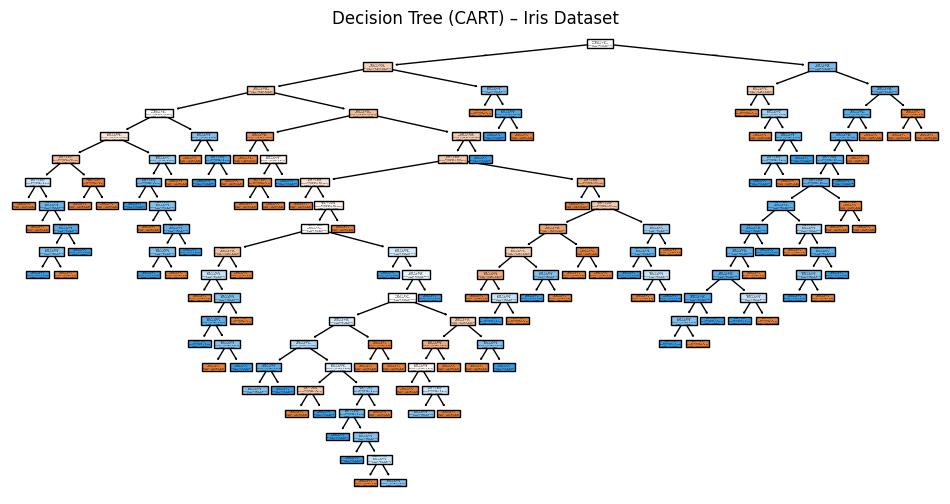

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_tree(
    cart,
    feature_names=X.columns,
    class_names=["Non-Setosa", "Setosa"],
    filled=True
)
plt.title("Decision Tree (CART) – Iris Dataset")
plt.show()
